# Context
A US bike-sharing provider "**BoomBikes**" had suffered an insignificant decline in revenue during the Corona pandemic. They would like to prepare themself and stay ahead of other competitors in the market once the government restriction is lifted and economic activities are resumed. Therefore, **BoomBikes** hired a consulting company to conduct various meteorological surveys to gather large-scale datasets on daily bike demand across the American market.

**____**

# Table of Content
1. [Problem Statement](#title_1)
2. [Objective Goal](#title_2)
3. [Jupyter Notebook Environment Setup](#title_3)
4. [Data Preprocessing](#title_4)
5. [EDA](#title_5)
<br>5.1 [Deep Dive On Seasonality](#title_5.1)
<br>5.2 [Statistic Testing on Categorical Variables](#title_5.2)
<br>-- 5.2.1 [Holiday](#title_5.2.1)
<br>-- 5.2.2 [Workingday](#title_5.2.2)
<br>-- 5.2.3 [Iekday](#title_5.2.3)
6. [Building Model, Linear Regression](#title_6)
<br>6.1 [Multicollinearity Check](#title_6.1)
<br>6.2 [Model Fitting & Evaluation](#title_6.2)
<br>6.3 [Residual Analysis On Train-data](#title_6.3)
7. [Conclusion](#title_7)

## 1. Problem Statement <a class="anchor" id="title_1"></a>

Based on the gathered dataset, **BoomBikes** would like to know below:
- Which variables are significant in predicting the demand for shared bikes.
- How Ill those variables describe the bike demands.

## 2. Objective Goal <a class="anchor" id="title_2"></a>
**BoomBikes** need a model to predict the demand for shared bikes with the available independent variables and understand the difference between different features. Based on the result, they will use the model and adjust the business strategy to meet the market demand as Ill as the customer expectation. In addition, the model will be used as one important measurement to understand the demand dynamics of a new market.

**Column 'cnt'** will be our dependant variable(Target variable) in the model.

## 3. Environment Setup <a class="anchor" id="title_3"></a>

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics #r2_score, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
from scipy.stats import ttest_ind, f_oneway, shapiro, mannwhitneyu, spearmanr, wilcoxon, kruskal
import warnings

warnings.filterwarnings('ignore')

In [375]:
%matplotlib inline

In [376]:
sns.set(font_scale = 1.5)

## 4. Data Preprocessing <a class="anchor" id="title_4"></a>

In [377]:
df = pd.read_csv('day.csv')
df.head(10)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   
5        6  06-01-2018       1   0     1        0        6           0   
6        7  07-01-2018       1   0     1        0        0           0   
7        8  08-01-2018       1   0     1        0        1           1   
8        9  09-01-2018       1   0     1        0        2           1   
9       10  10-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   
5           1   8.378268  11.66045  51.8261   6.000868      88        1518   
6           2   8.057402  10.44195  49.8696  11.304642     148        1362   
7           2   6.765000   8.11270  53.5833  17.875868      68         891   
8           1   5.671653   5.80875  43.4167  24.250650      54         768   
9           1   6.184153   7.54440  48.2917  14.958889      41        1280   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606  
6  1510  
7   959  
8   822  
9  1321

In [378]:
df.rename(columns = {'instant':'dayindex', 'dteday': 'date', 'mnth':'month', 'yr':'year', 'cnt':'count'}, inplace = True)
df.head()

dayindex        date  season  year  month  holiday  weekday  workingday  \
0         1  01-01-2018       1     0      1        0        1           1   
1         2  02-01-2018       1     0      1        0        2           1   
2         3  03-01-2018       1     0      1        0        3           1   
3         4  04-01-2018       1     0      1        0        4           1   
4         5  05-01-2018       1     0      1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

   count  
0    985  
1    801  
2   1349  
3   1562  
4   1600

In [379]:
df.shape

(730, 16)

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dayindex    730 non-null    int64  
 1   date        730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  count       730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [381]:
df.isnull().any()

dayindex      False
date          False
season        False
year          False
month         False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [382]:
df.describe()

dayindex      season        year       month     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered        count  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [383]:
df.weathersit.unique() 

array([2, 1, 3], dtype=int64)

In [384]:
df['date'] = pd.to_datetime(df['date']) # convert string into datetime format, just in case for future usage

####  <font color='green'>Data Preprocessing Result</font>: The provided original dataset is clean and no null values. Therefore, I may proceed to the next exploratory data anaylsis.
**____**

## 5. EDA <a class="anchor" id="title_5"></a>

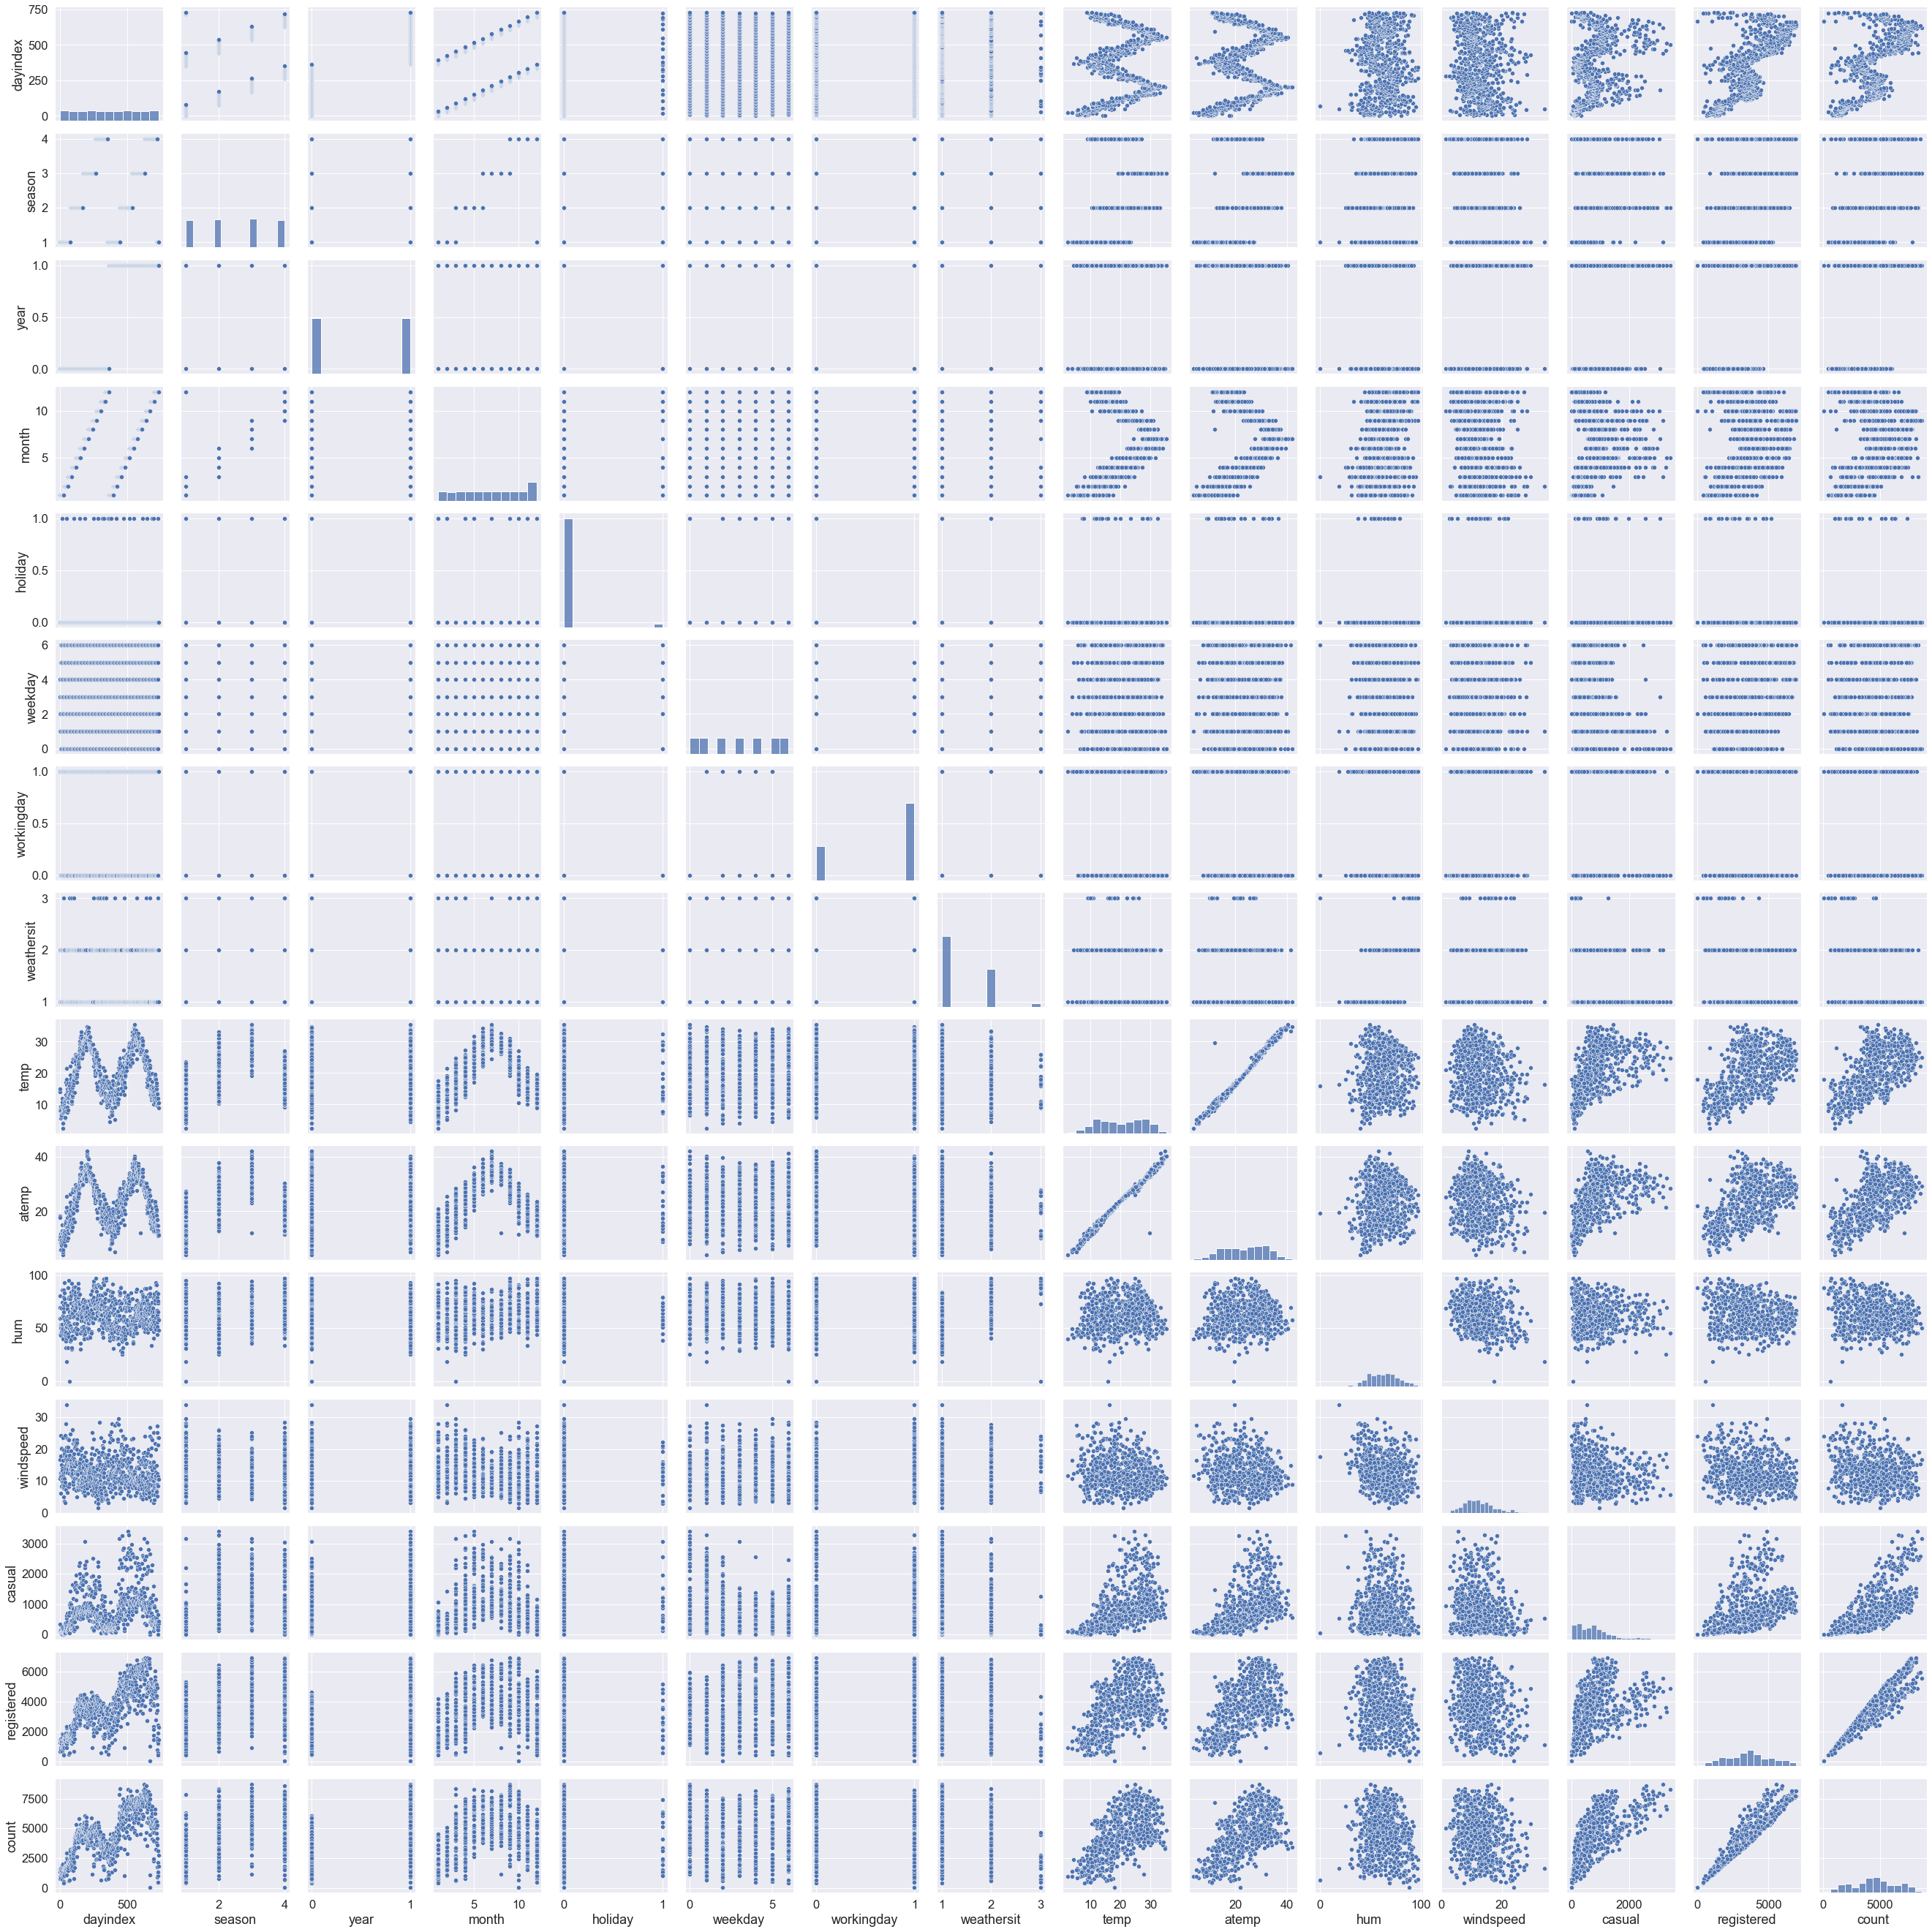

In [385]:
sns.pairplot(df)
plt.show()

#### There above pairplot is overloaded and hard to interpret, the column needs to separate out by numeric and categorical type

In [386]:
cat_vars = df[['season','year','month','holiday','weekday','workingday','weathersit','count']] # categorical variables
cat_vars

season  year  month  holiday  weekday  workingday  weathersit  count
0         1     0      1        0        1           1           2    985
1         1     0      1        0        2           1           2    801
2         1     0      1        0        3           1           1   1349
3         1     0      1        0        4           1           1   1562
4         1     0      1        0        5           1           1   1600
..      ...   ...    ...      ...      ...         ...         ...    ...
725       1     1     12        0        5           1           2   2114
726       1     1     12        0        6           0           2   3095
727       1     1     12        0        0           0           2   1341
728       1     1     12        0        1           1           1   1796
729       1     1     12        0        2           1           2   2729

[730 rows x 8 columns]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


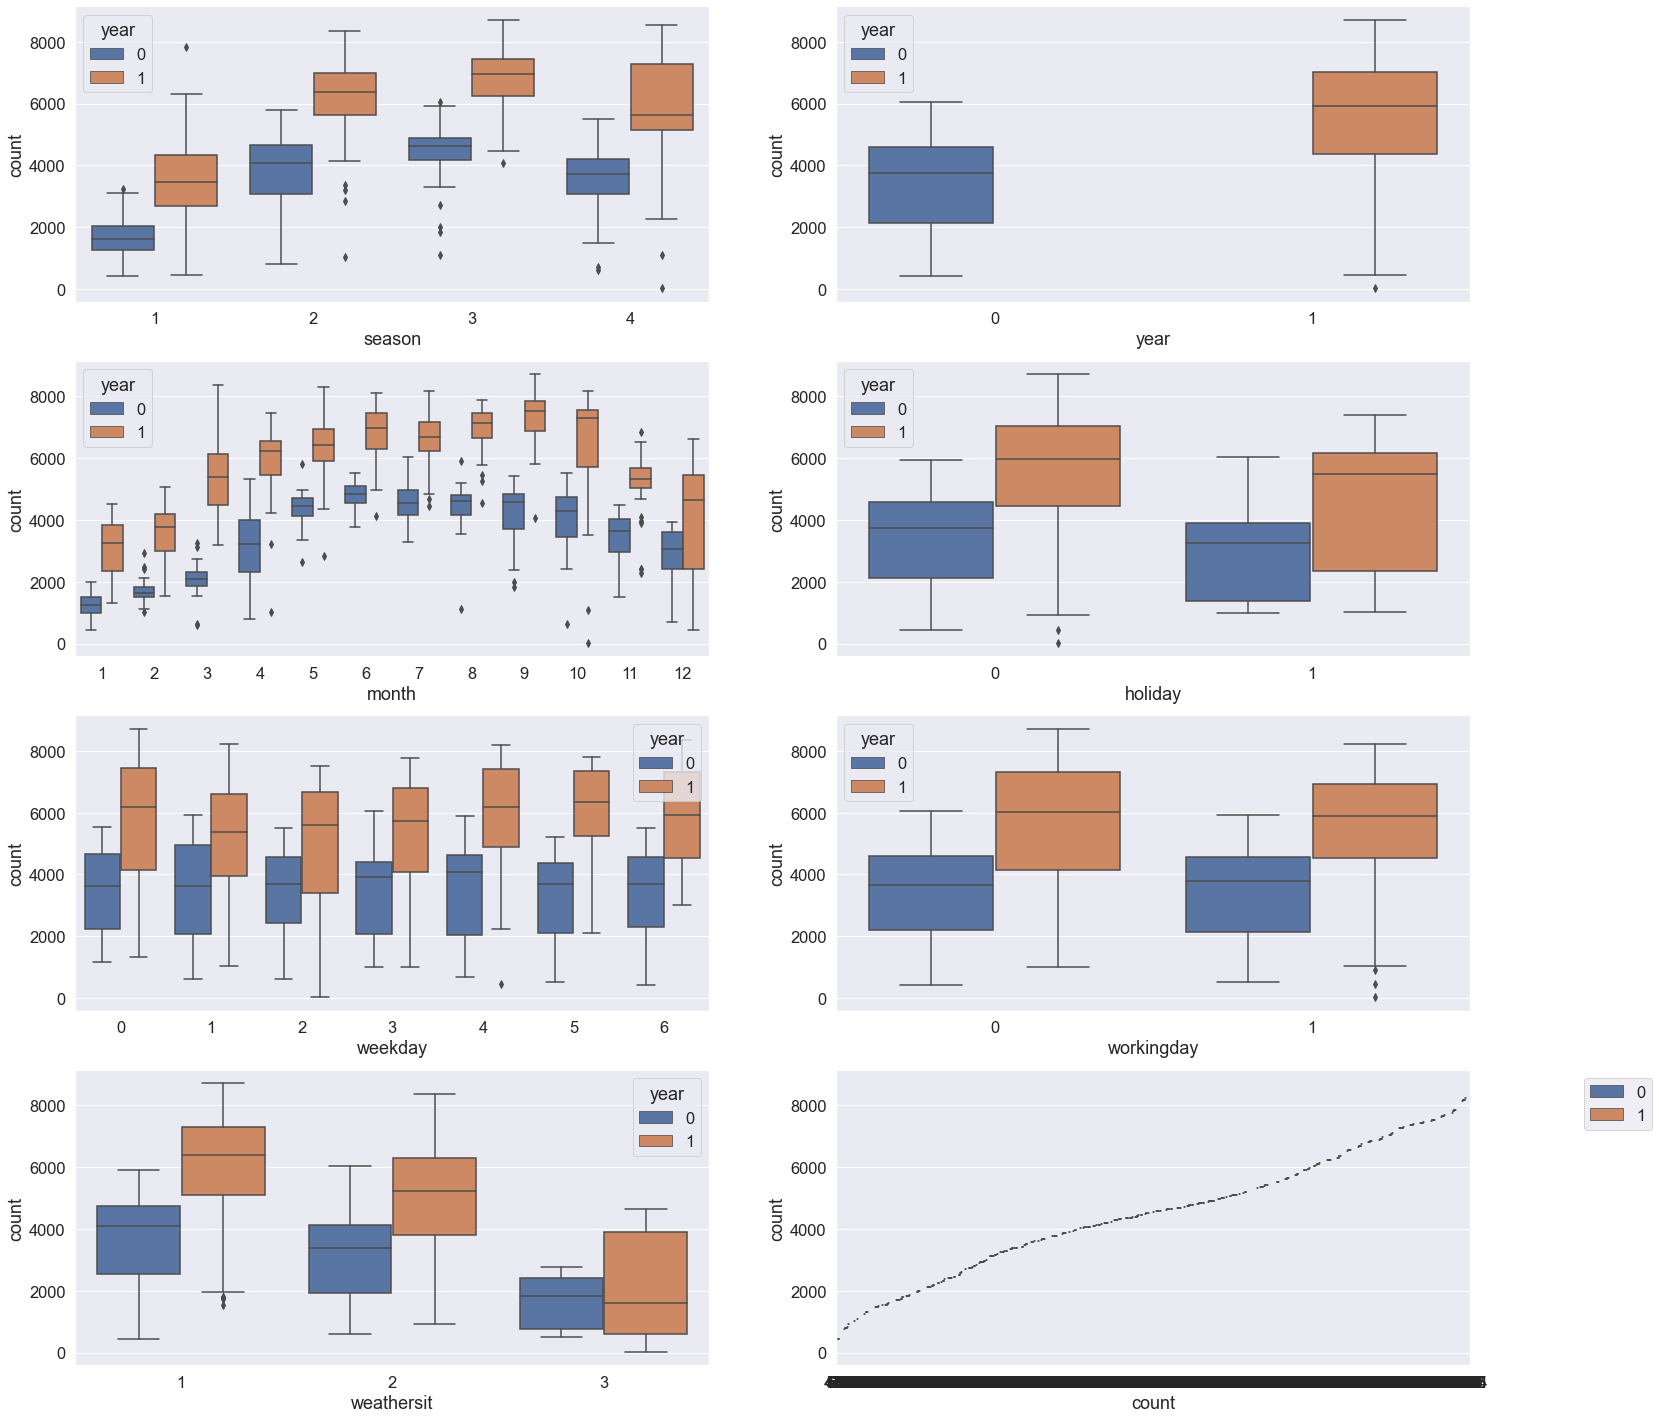

In [387]:
#categorical variables VS shared bike demand
fig, axs = plt.subplots(int(len(cat_vars.columns)/2), 2, figsize = (25,25))
plt.subplots_adjust(hspace=0.2, wspace = 0.2)

for i, c in enumerate(cat_vars.columns):
    
    sns.boxplot(data = cat_vars, x = c, y = 'count', hue = 'year', ax = axs[int(np.floor(i/2)), i%2])
    plt.legend(bbox_to_anchor = (1.3, 1))

#### <font color='green'> Categorical Variables VS Shared Bike Demand Result</font>: I found that shared bike demand in year 1(2019) overall is higher than in year 0(2018) despite of the variables. Aside from that, back to the original objective, if I look at only year 0(2018), I knew that season & month(both are time-series) and Iathersit variables look there is a significant impact on the demand. 

#### As for holiday, weekday, and workingday, these variables seem like doesn't hold a significant influence on the shared bike demands. but I Iren't sure about it. HoIver, I can use statistical analysis to prove our assumption later on.

In [388]:
numeric_vars = pd.concat([df[df.columns.difference(list(cat_vars.columns))],df['count']], axis = 1) #numeric varaibles
numeric_vars.head()

atemp  casual       date  dayindex      hum  registered       temp  \
0  18.18125     331 2018-01-01         1  80.5833         654  14.110847   
1  17.68695     131 2018-02-01         2  69.6087         670  14.902598   
2   9.47025     120 2018-03-01         3  43.7273        1229   8.050924   
3  10.60610     108 2018-04-01         4  59.0435        1454   8.200000   
4  11.46350      82 2018-05-01         5  43.6957        1518   9.305237   

   windspeed  count  
0  10.749882    985  
1  16.652113    801  
2  16.636703   1349  
3  10.739832   1562  
4  12.522300   1600

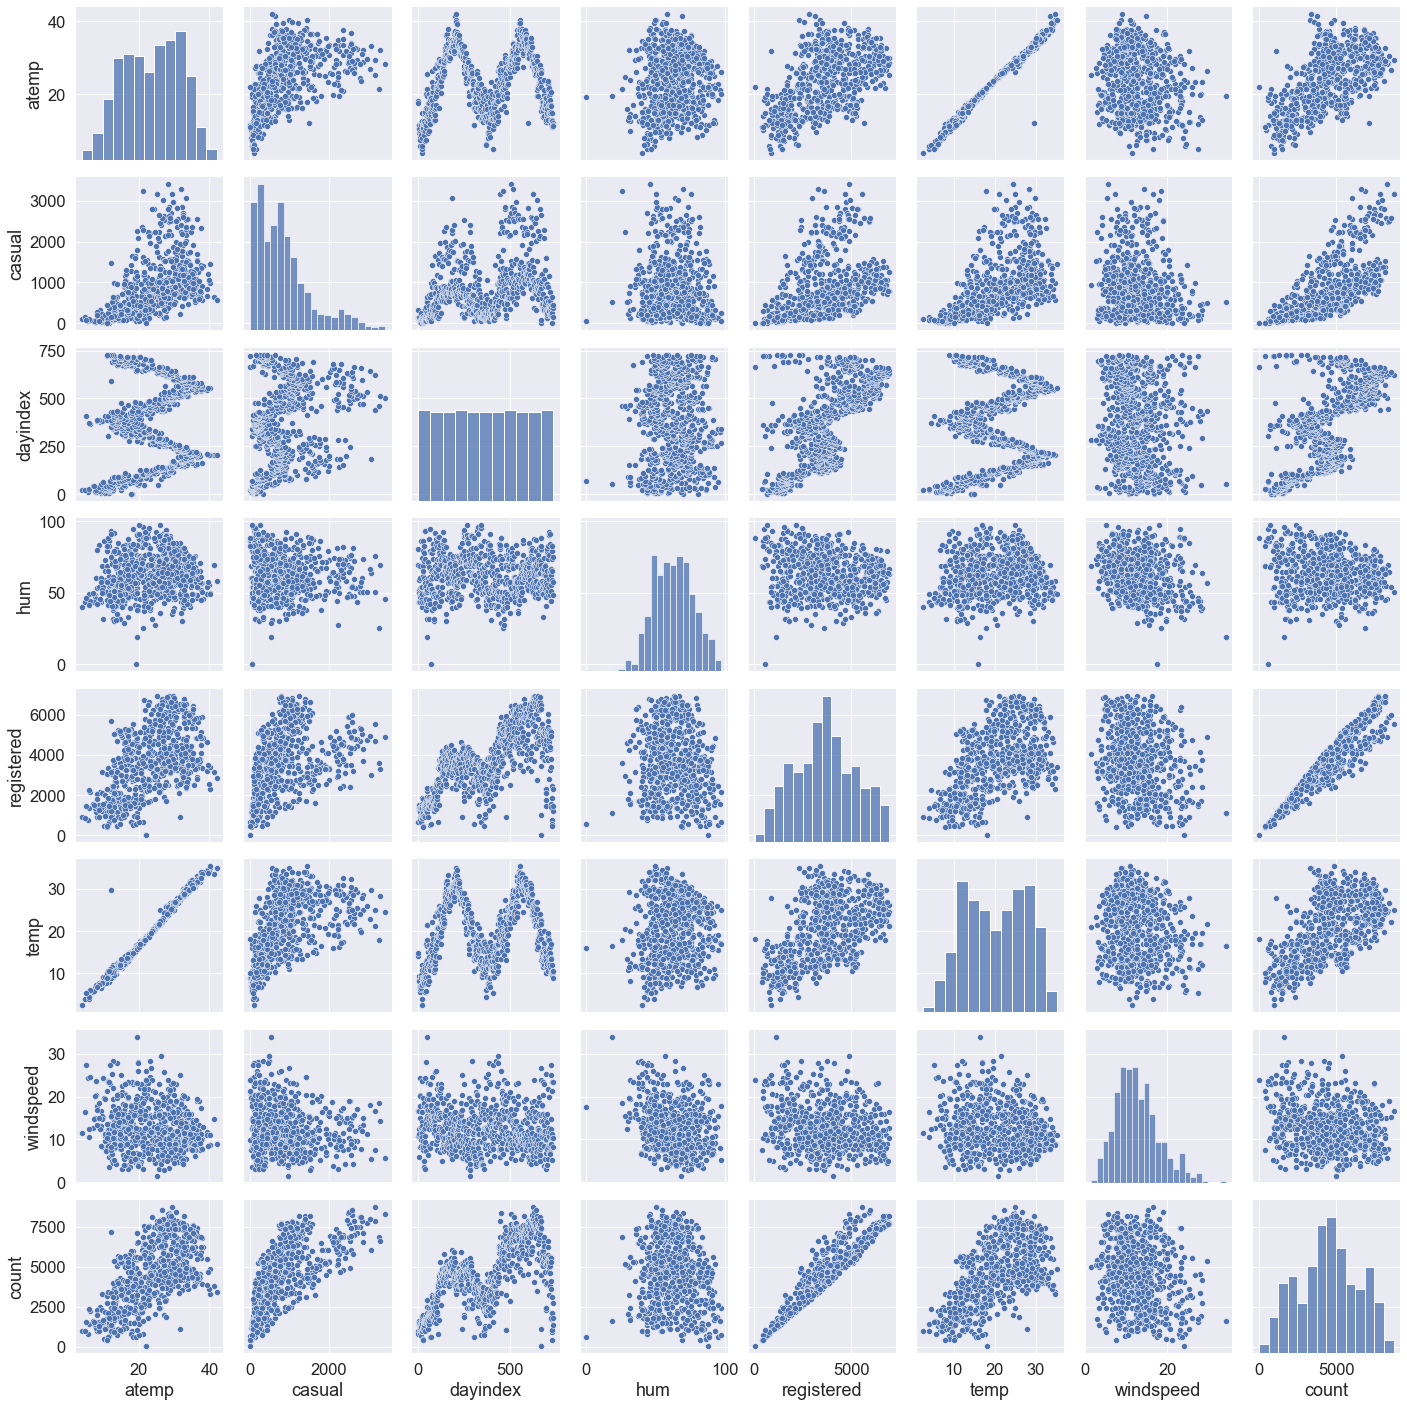

In [389]:
# numeric variables VS shared bike demand
sns.pairplot(numeric_vars)

<AxesSubplot:>

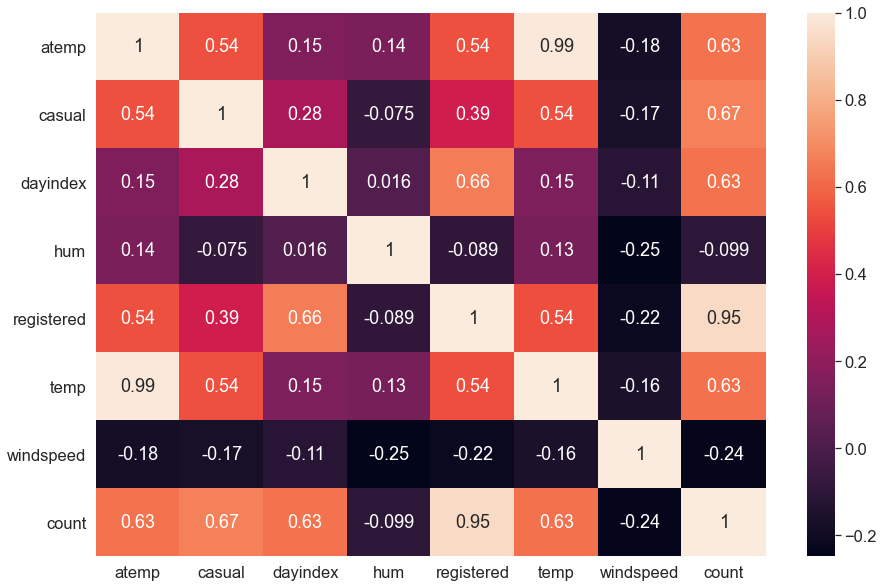

In [390]:
plt.figure(figsize = (15,10))
sns.heatmap(numeric_vars.corr(), annot = True)

#### <font color='green'> Numeric Variables VS Shared Bike Demand Result</font>: Based on the pairplot & heatmap, I knew there are linear relationship betIen shared bike demand and variables(atemp, casual, registered, and temp). The column 'dayindex' shown the seasonilty trend, where I also found in our previous result on categorical variables VS demand (month & season).

#### Opinion on the seasonality, instead of 730, I could use the column 'dayindex' divided into 2 for each year where it consist 365 each, to stimulate and let the model recognize the seasonality.  Of course, I can use other model such like time-series forecasting model(e.g SARIMAX), but it is out of the module scope.

In [391]:
# Using modulus to divide the dayindex into two part, 365 each year(0,1)
df['dayofyear'] = (df['dayindex']%365).replace(0, 365)
df.head()

dayindex       date  season  year  month  holiday  weekday  workingday  \
0         1 2018-01-01       1     0      1        0        1           1   
1         2 2018-02-01       1     0      1        0        2           1   
2         3 2018-03-01       1     0      1        0        3           1   
3         4 2018-04-01       1     0      1        0        4           1   
4         5 2018-05-01       1     0      1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

   count  dayofyear  
0    985          1  
1    801          2  
2   1349          3  
3   1562          4  
4   1600          5

### 5.1 Deep Dive On Seasonality <a class="anchor" id="title_5.1"></a>

#### Creation the dayofyear, 365 per year(0:2018, 1:2019), stimulate the seasonality

In [392]:
numeric_vars = pd.concat([df[df.columns.difference(list(cat_vars.columns))],df['count']], axis = 1) #numeric varaibles
numeric_vars.head()

atemp  casual       date  dayindex  dayofyear      hum  registered  \
0  18.18125     331 2018-01-01         1          1  80.5833         654   
1  17.68695     131 2018-02-01         2          2  69.6087         670   
2   9.47025     120 2018-03-01         3          3  43.7273        1229   
3  10.60610     108 2018-04-01         4          4  59.0435        1454   
4  11.46350      82 2018-05-01         5          5  43.6957        1518   

        temp  windspeed  count  
0  14.110847  10.749882    985  
1  14.902598  16.652113    801  
2   8.050924  16.636703   1349  
3   8.200000  10.739832   1562  
4   9.305237  12.522300   1600

<AxesSubplot:>

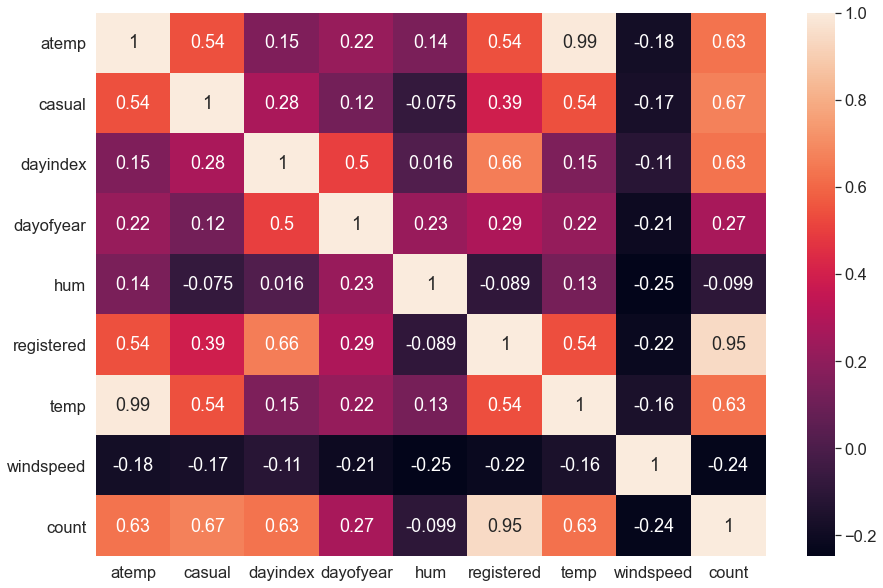

In [393]:
plt.figure(figsize = (15,10))
sns.heatmap(numeric_vars.corr(), annot = True)

Text(0.5, 1.0, 'Year(0:2018, 1:2019) VS Shared Bike Demand')

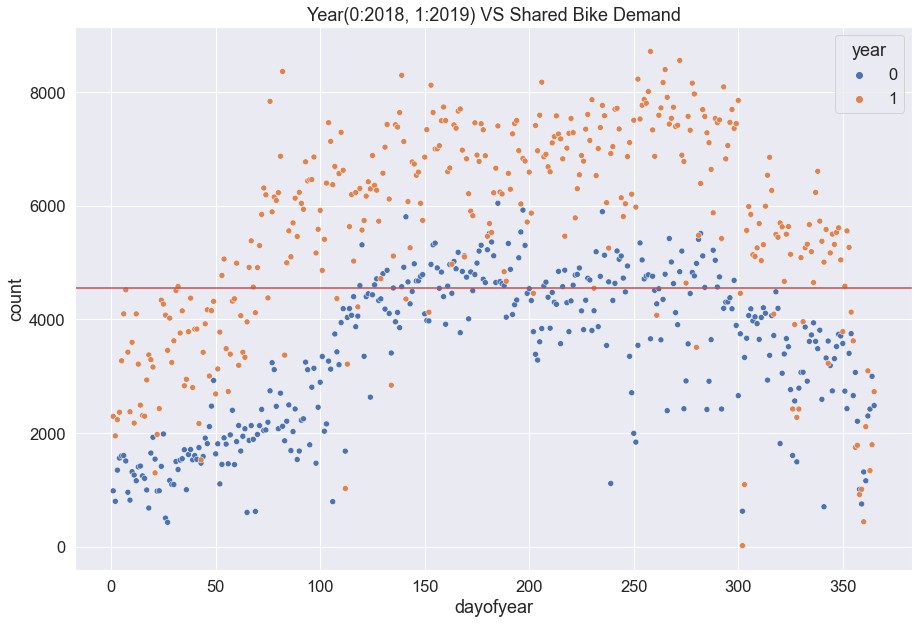

In [394]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = df, x = 'dayofyear', y = 'count', hue = 'year')
plt.axhline(np.median(df['count']), color = 'r')
plt.title('Year(0:2018, 1:2019) VS Shared Bike Demand')

Text(0.5, 1.0, '2019 Year Season VS Shared Bike Demand')

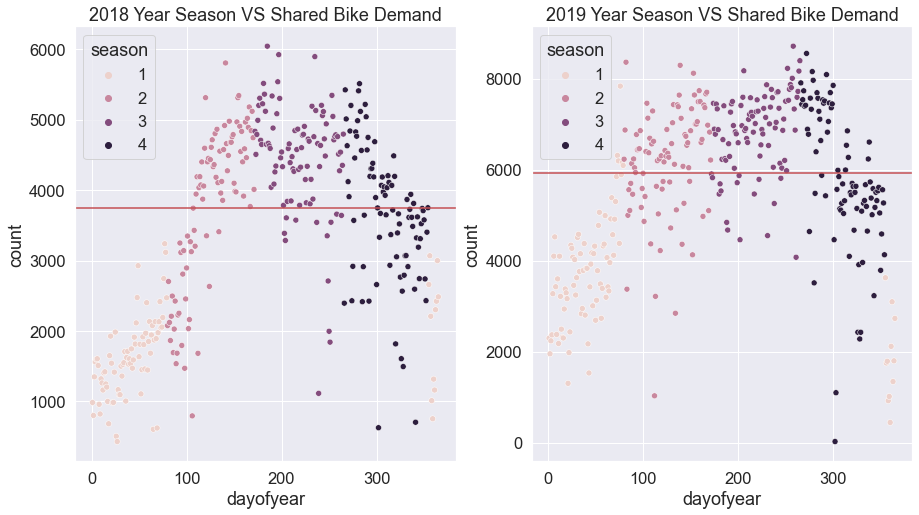

In [395]:
fig, ax = plt.subplots(1,2, figsize=(15,8))

plt.subplot(121)
sns.scatterplot(data = df[df['year']==0], x = 'dayofyear', y = 'count', hue = 'season')
plt.axhline(df[df['year']==0]['count'].median(), color = 'r')
plt.title('2018 Year Season VS Shared Bike Demand')

plt.subplot(122)
sns.scatterplot(data = df[df['year']==1], x = 'dayofyear', y = 'count', hue = 'season')
plt.axhline(df[df['year']==1]['count'].median(), color = 'r')
plt.title('2019 Year Season VS Shared Bike Demand')

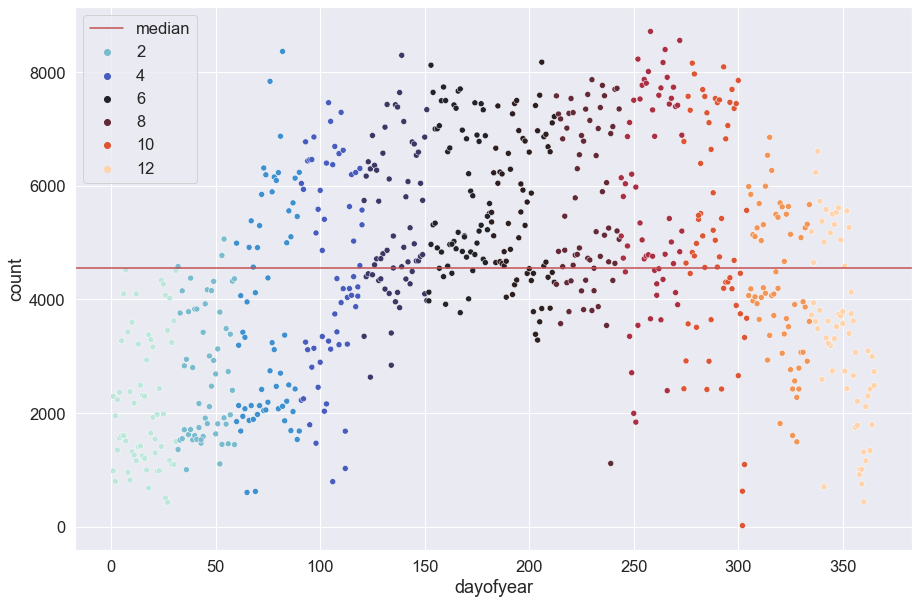

In [396]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = df, x = 'dayofyear', y = 'count', hue = 'month', palette = 'icefire')
plt.axhline(np.median(df['count']), color = 'r', label = 'median')
plt.legend()

In [397]:
df[['dayofyear','dayindex','count']].corr()

dayofyear  dayindex     count
dayofyear   1.000000  0.499999  0.272993
dayindex    0.499999  1.000000  0.629896
count       0.272993  0.629896  1.000000

#### <font color='green'> Deep Dive On Seasonality Result</font>: From all the scatterplots above, I knew the high demand roughly falling between 'March' and 'November'(Spring, Summer, & Fall), both years 2018 & 2019.  Whether the model is built or not, this is useful insight for the "BoomBikes" management team. E.g., the team can cut advertising costs in the winter season due to ROI might be low.


### 5.2 Statistical Testing on Categorical Variables <a class="anchor" id="title_5.2"></a>

#### 5.2.1 Holiday <a class="anchor" id="title_5.2.1"></a>

<AxesSubplot:>

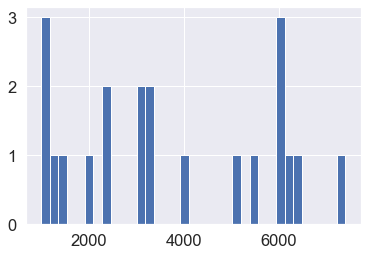

In [398]:
df.query('holiday == 1')['count'].hist(bins = 35) 
# data is less than 30, it is quite hard to say by just looking at histogram. 
# I will use statiscal test to testify it's normality

<AxesSubplot:>

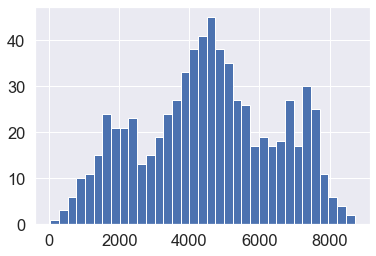

In [399]:
df.query('holiday == 0')['count'].hist(bins = 35)

In [400]:
print(shapiro(df.query('holiday == 1')['count'])) # normally distributed, barely passed the 0.05 alpha
print(shapiro(df.query('holiday == 0')['count'])) # not normmaly distributed

ShapiroResult(statistic=0.9118006229400635, pvalue=0.059599630534648895)
ShapiroResult(statistic=0.9805829524993896, pvalue=4.349857363195042e-08)


In [401]:
holiday_0 = df.query('holiday == 0')['count']
holiday_1 = df.query('holiday == 1')['count']
 # H0 ,Holiday_0 & Holiday_ 1 are equal
 # H1 ,Holiday_0 & Holiday_ 1 are not equal
mannwhitneyu(holiday_0, holiday_1, alternative = 'two-sided')

MannwhitneyuResult(statistic=9102.5, pvalue=0.08178616914940055)

#### I used non-parametric test to check whether there is significant demand difference betIen holiday 0 & 1. The result is I failed to reject null hypothesis, there is no significant difference.

#### 5.2.2 Workingday <a class="anchor" id="title_5.2.2"></a>

<AxesSubplot:>

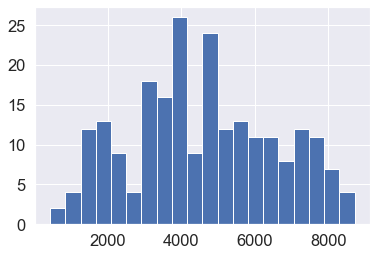

In [402]:
df.query('workingday == 0')['count'].hist(bins = 20)

<AxesSubplot:>

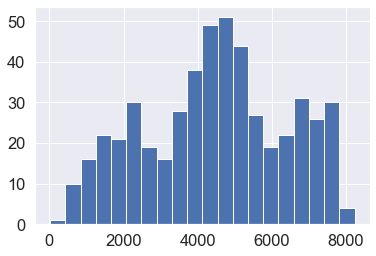

In [403]:
df.query('workingday == 1')['count'].hist(bins = 20)

In [404]:
print(shapiro(df.query('workingday == 0')['count'])) # not normally distributed
print(shapiro(df.query('workingday == 1')['count'])) # not normmaly distributed

ShapiroResult(statistic=0.9778729677200317, pvalue=0.0012988331727683544)
ShapiroResult(statistic=0.9753212332725525, pvalue=1.6388543144785217e-07)


In [405]:
workingday_0 = df.query('workingday == 0')['count']
workingday_1 = df.query('workingday == 1')['count']
 # H0 ,both are equal
 # H1 ,both are not equal
mannwhitneyu(workingday_0, workingday_1, alternative = 'two-sided')

MannwhitneyuResult(statistic=58034.5, pvalue=0.6812473613894835)

In [406]:
spearmanr(workingday_0, workingday_1.sample(n=226))

SpearmanrResult(correlation=0.014731352484795285, pvalue=0.8256805718779088)

#### I used non-parametric test to check whether there is significant demand difference betIen workingday 0 & 1. The result is I failed to reject null hypothesis, there is no significant difference.

#### 5.2.3 weekday <a class="anchor" id="title_5.2.3"></a>

In [407]:
weekday_shapiro = {'weekday':[],'shapiro_pval':[]}
for i in range(len(df.weekday.unique())):

    stats , pval = shapiro(df[df['weekday'] == i]['count'])
    weekday_shapiro['weekday'].append(i)
    weekday_shapiro['shapiro_pval'].append(pval)
    
df_weekday_shapiro = pd.DataFrame(weekday_shapiro)
df_weekday_shapiro['normal_distributed'] = df_weekday_shapiro['shapiro_pval'].apply(lambda x : 'yes' if x > 0.05 else 'no')
df_weekday_shapiro

weekday  shapiro_pval normal_distributed
0        0      0.011966                 no
1        1      0.012349                 no
2        2      0.019835                 no
3        3      0.008009                 no
4        4      0.003265                 no
5        5      0.001101                 no
6        6      0.065957                yes

<AxesSubplot:xlabel='count', ylabel='Density'>

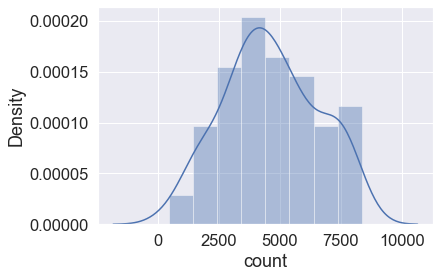

In [408]:
sns.distplot(df[df['weekday'] == 6]['count'])

In [409]:
k_test = {}
# H0, There is no difference betIen the groups
# H1, There is difference betIen the groups
for i in range(len(df['weekday'].unique())):
    k_test[i] = df[df['weekday'] == i]['count']
k_test.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6])

In [410]:
kruskal(k_test[0],k_test[1],k_test[2],k_test[3],k_test[4],k_test[5],k_test[6])

KruskalResult(statistic=4.321566346141064, pvalue=0.63324713356095)

#### I used non-parametric test to check whether there is significant demand difference betIen Iekday from 0 to 6. The result is I failed to reject null hypothesis, there is no significant difference.

#### <font color='green'> Statistical Testing on Categorical Variables</font>: I had done statistical testing on there categorical variables like 'Holiday', 'Workingday', and 'Weekday'. The result shown these categorical variables have not influence power to our target variables. Therefore, I'll exclude these categorical variables from the independant variable list.
**____**

## 5.3 Independant Variables Selection  <a class="anchor" id="title_5"></a>

#### I'll drop the casual & registered columns as Ill, because the count is the sum total of casual & registered, with no doubt, it is multicollinearity.

In [411]:
# these are the independant variables I have filtered out based on business knowledge, logicalsense, & statistical testing
ind_var_list = ['season','month','weathersit','atemp', 'temp','dayindex','dayofyear']
target_var = ['count']

In [412]:
df[ind_var_list].head()

season  month  weathersit     atemp       temp  dayindex  dayofyear
0       1      1           2  18.18125  14.110847         1          1
1       1      1           2  17.68695  14.902598         2          2
2       1      1           1   9.47025   8.050924         3          3
3       1      1           1  10.60610   8.200000         4          4
4       1      1           1  11.46350   9.305237         5          5

In [413]:
df[target_var].head()

count
0    985
1    801
2   1349
3   1562
4   1600

**____**

## 6. Building Model, Linear Regression  <a class="anchor" id="title_6"></a>

### 6.1 Multicollinearity Check <a class="anchor" id="title_6.1"></a>

In [414]:
X = df[ind_var_list]
y = df[target_var]

In [415]:
current_vars = []
for i in X.columns:
    current_vars.append(i)
    
    x_train_lm = sm.add_constant(X[current_vars])
    lr = sm.OLS(y, x_train_lm).fit()
    #print(lr.params)
    print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     142.5
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           4.01e-30
Time:                        22:25:38   Log-Likelihood:                -6495.0
No. Observations:                 730   AIC:                         1.299e+04
Df Residuals:                     728   BIC:                         1.300e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2745.1239    161.587     16.988      0.0

#### I knew that 'month' & 'temp' have correlated with other independant variables. Based on logical thinking & common sense, it makes sense as 'month' is clearly related to 'season'. Also based on the above observation, 'atemp' p-value increased after 'temp' was added into the model, it is clearly both 'atemp' and 'temp' are associated.

In [416]:
x_train_lm = sm.add_constant(X[['season','month','weathersit','atemp', 'temp','dayindex','dayofyear']])
lr = sm.OLS(y, x_train_lm).fit()
#print(lr.params)
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     371.8
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          1.60e-234
Time:                        22:25:38   Log-Likelihood:                -6002.9
No. Observations:                 730   AIC:                         1.202e+04
Df Residuals:                     722   BIC:                         1.206e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        611.4070    167.160      3.658      0.000     283.230     939.584
season       529.0809     56.736      9.325      0.000     417.694     640.467
month        239.5660    117.914      2.032      0.043       8.071     471.061
weathersit  -759.5926     62.350    -12.183      0.000    -882.001    -637.184
atemp         85.9793     32.229      2.668      0.008      22.706     149.253
temp          33.7854     34.866      0.969      0.333     -34.666     102.237
dayindex       5.6767      0.184     30.802      0.000       5.315       6.039
dayofyear    -14.9226      3.823     -3.903      0.000     -22.429      -7.416
==============================================================================
Omnibus:                       82.422   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.264
Skew:                          -0.662   Prob(JB):                     3.92e-38
Kurtosis:                       4.978   Cond. No.                     2.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [438]:
x_train_lm = sm.add_constant(X[['season','weathersit','month','temp','dayindex','dayofyear']]) #removed 'atemp'
lr = sm.OLS(y, x_train_lm).fit()
print(lr.params)
lr.summary()

const         757.206538
season        538.084680
weathersit   -763.545593
month         254.840061
temp          125.908382
dayindex        5.672571
dayofyear     -15.429930
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     428.9
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          2.54e-234
Time:                        22:27:07   Log-Likelihood:                -6006.5
No. Observations:                 730   AIC:                         1.203e+04
Df Residuals:                     723   BIC:                         1.206e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        757.2065    158.640      4.773      0.000     445.757    1068.657
season       538.0847     56.874      9.461      0.000     426.426     649.743
weathersit  -763.5456     62.595    -12.198      0.000    -886.436    -640.655
month        254.8401    118.272      2.155      0.032      22.642     487.038
temp         125.9084      4.840     26.013      0.000     116.406     135.411
dayindex       5.6726      0.185     30.651      0.000       5.309       6.036
dayofyear    -15.4299      3.835     -4.024      0.000     -22.959      -7.901
==============================================================================
Omnibus:                       74.547   Durbin-Watson:                   1.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.829
Skew:                          -0.616   Prob(JB):                     1.77e-33
Kurtosis:                       4.855   Cond. No.                     2.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <font color='green'> Multicollinearity Check</font>: After the investigation on multicollinearity check, I found out few potential columns(p-value >0.05) that are possibly redundant. I decided to remove 'atemp' from our independent variables.

### The decision was made based on the assumptions below: 
1. 'atemp' is represent the actual temperature of the day
2. 'temp' is represent the projection temperature of the day


####  <font color='red'>IMPORTANT NOTE, I'll never know the 'atemp' until the actual day is come. However, for prediction model perspective, we want to predict the future shared biked demand and we cannot wait for the 'atemp' data until the day come.<br><br>Therefore, based on the consideration of future data collection practical factor, I will drop 'atemp' and keep 'temp', this action will only decrease the R2_score insignificantly.</font>
**____**


### 6.2 Model Fitting & Evaluation <a class="anchor" id="title_6.2"></a>

In [418]:
# create dummies for categorical variablesm with N-1
X_dummies = pd.get_dummies(X, columns = ['season','weathersit'], drop_first = True)
X_dummies = X_dummies.drop(columns= ['atemp']) # Based on the 6.1 multicollinearity check result
X_dummies

month       temp  dayindex  dayofyear  season_2  season_3  season_4  \
0        1  14.110847         1          1         0         0         0   
1        1  14.902598         2          2         0         0         0   
2        1   8.050924         3          3         0         0         0   
3        1   8.200000         4          4         0         0         0   
4        1   9.305237         5          5         0         0         0   
..     ...        ...       ...        ...       ...       ...       ...   
725     12  10.420847       726        361         0         0         0   
726     12  10.386653       727        362         0         0         0   
727     12  10.386653       728        363         0         0         0   
728     12  10.489153       729        364         0         0         0   
729     12   8.849153       730        365         0         0         0   

     weathersit_2  weathersit_3  
0               1             0  
1               1             0  
2               0             0  
3               0             0  
4               0             0  
..            ...           ...  
725             1             0  
726             1             0  
727             1             0  
728             0             0  
729             1             0  

[730 rows x 9 columns]

In [419]:
y = df[['count']]

In [420]:
x_train, x_test, y_train, y_test = train_test_split(X_dummies, y, train_size = 0.8, random_state = 100)

In [421]:
print(x_train.shape, y_train.shape) #cross-check if the split done properly
print(x_test.shape, y_test.shape)

(584, 9) (584, 1)
(146, 9) (146, 1)


In [422]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
print('R2_score On Train-data: ', lr_model.score(x_train, y_train))
print('R2_score On Test-data: ', lr_model.score(x_test, y_test))

R2_score On Train-data:  0.8111543352518289
R2_score On Test-data:  0.7838977204405526


In [423]:
y_prediction = lr_model.predict(x_test)

In [424]:
print('R2_score: ', metrics.r2_score(y_test, y_prediction))
print('MSE: ', metrics.mean_squared_error(y_test, y_prediction))
print('RSME: ',np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

R2_score:  0.7838977204405526
MSE:  733975.1920000081
RSME:  856.7235213299609


In [425]:
pd.DataFrame({'ind_vars':X_dummies.columns, 'absolute_coef':abs(lr_model.coef_[0]), # Summary of overall coef in the model
              'coef':lr_model.coef_[0]}).sort_values(by = 'absolute_coef')

ind_vars  absolute_coef         coef
2      dayindex       5.463417     5.463417
3     dayofyear      11.067837   -11.067837
1          temp     132.996309   132.996309
0         month     163.169135   163.169135
7  weathersit_2     620.618056  -620.618056
5      season_3     823.332096   823.332096
4      season_2    1110.571367  1110.571367
6      season_4    1612.541922  1612.541922
8  weathersit_3    2575.275303 -2575.275303

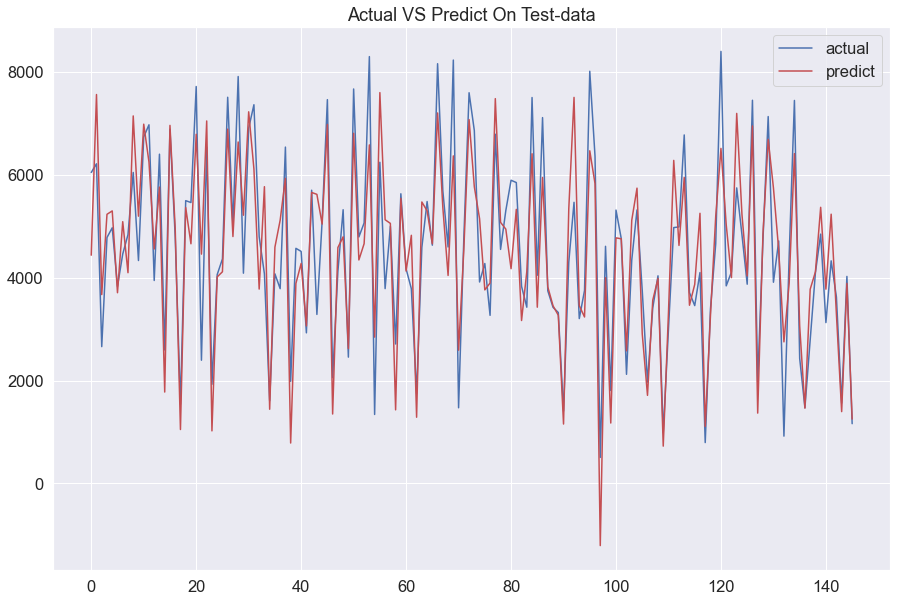

In [426]:
plt.figure(figsize = (15,10))
plt.plot(x_test.reset_index().index, y_test, label = 'actual')
plt.plot(x_test.reset_index().index, y_prediction, label = 'predict', c = 'r')
plt.legend()
plt.title('Actual VS Predict On Test-data')
plt.show()

#### Trying scaling the data and see if there are accuracy difference between scaled & non-scaled data

In [427]:
#Split before scaling transformation
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_dummies, y, train_size = 0.8,
                                                                               random_state = 100)

In [428]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)
x_test_scaled = scaler.fit_transform(x_test_scaled)
y_test_scaled = scaler.fit_transform(y_test_scaled)

In [429]:
lr_model_scaled = LinearRegression()
lr_model_scaled.fit(x_train_scaled, y_train_scaled)
print('R2_score On Scaled_Train-data: ', lr_model_scaled.score(x_train_scaled, y_train_scaled))
print('R2_score On Scaled Test-data: ', lr_model_scaled.score(x_test_scaled, y_test_scaled))

R2_score On Scaled_Train-data:  0.8111543352518289
R2_score On Scaled Test-data:  0.7840415478334654


In [430]:
y_predict_scaled = lr_model_scaled.predict(x_test_scaled)

In [431]:
print('R2_score: ', metrics.r2_score(y_test_scaled, y_predict_scaled))
print('MSE: ', metrics.mean_squared_error(y_test_scaled,y_predict_scaled))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test_scaled,y_predict_scaled)))

R2_score:  0.7840415478334654
MSE:  0.011785508546404564
RMSE:  0.10856108209853366


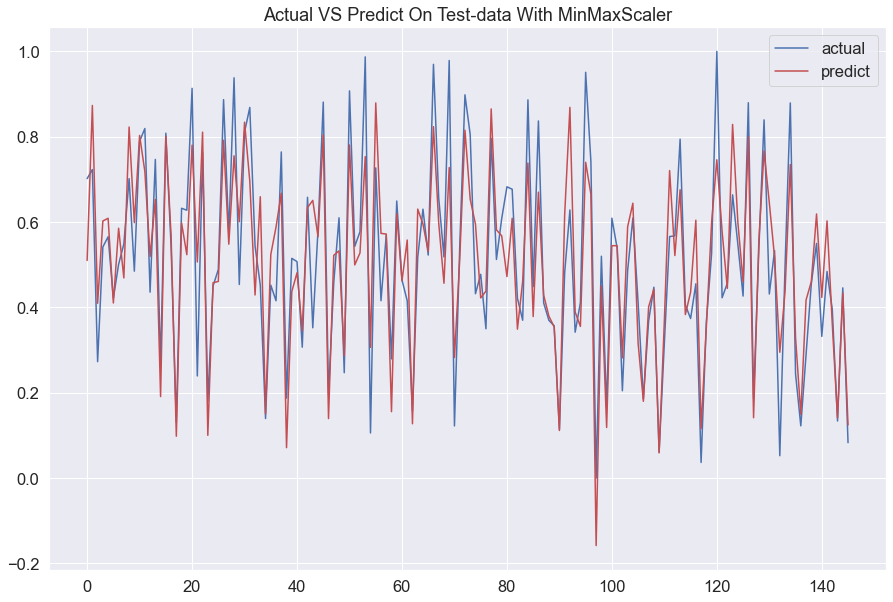

In [432]:
plt.figure(figsize = (15,10))
plt.plot(range(len(x_test_scaled)), y_test_scaled, label = 'actual')
plt.plot(range(len(x_test_scaled)), y_predict_scaled, label = 'predict', c = 'r')
plt.legend()
plt.title('Actual VS Predict On Test-data With MinMaxScaler')
plt.show()

#### Seem like there is no much difference between the scaled model & non-scaled 

### 6.3 Residual Analysis On Train-data <a class="anchor" id="title_6.3"></a>

In [433]:
y_train_prediction = lr_model.predict(x_train)

Text(0.5, 0, 'Errors')

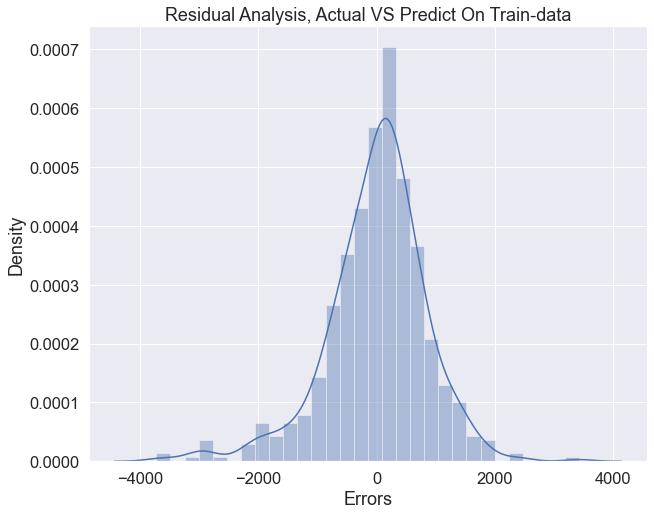

In [434]:
# Actual Vs Predict On Train-data result, residual analysis
plt.figure(figsize = (10,8))
sns.distplot((y_train-y_train_prediction), bins = 30)
plt.title('Residual Analysis, Actual VS Predict On Train-data')
plt.xlabel('Errors', fontsize = 18)  

In [435]:
shapiro((y_train-y_train_prediction))
# pval more than 0.05, meaning to say error variance on train-data is normally distributed

ShapiroResult(statistic=0.956852912902832, pvalue=4.72961340231004e-12)

In [436]:
0.8111- 0.7838

0.02729999999999999

#### <font color='green'> Building Model, Linear Regression Result</font>: I have conducted a multicollinearity check across the independent variables to minimize the redundant columns. Followed by model evaluation with two different models(Scaled & Non-scaled), one with minmaxscaler and another without scaler. However, the result shows both R2_score aren't that much different.

**1. R2_score on Test-data: 0.783**
<br>**1. R2_score on Scaled Test-data: 0.784**

#### Lastly, I have plotted out the residual analysis on train data (Actual Vs Predict), and the errors are normally distributed with the Shapiro test as proof.

#### Final Model Result, Multi Linear Regression(Without Scaling), Test-size = 0.8:
**1. R2_score On Train-data:  0.8111**
<br>**2. R2_score On Test-data:  0.7838**
<br>**3. The R2_score difference between Train-data & Test-data is 0.0273**

## 7. Conclusion  <a class="anchor" id="title_7"></a>

### Summary
#### Based on the previous comment, a good model is built with the R2_score between 0.784 and 0.811 where I assumed the **BoomBikes** able to use the model to predict the future shared bikes demand and re-align the business strategy if needed, refer to section 6.

#### Back to the problem statement that we have defined in the first, I found out that *'dayindex'(prev:Index), 'season', 'temp', & 'weathersit'* are the main drivers and strong influence power to predict the demand of shared bikes('count'). Additionally, all these main drivers are related to the factors of seasonality and environment. Especially, we knew there is a huge demand from March to November. The Winter season seems the least demand for the shared bikes which is able to explain that people might not favor riding a cycle in a cold environment, which also can be proven with the numeric_vars pair plot, refer to section 5.

### Next Action
#### Based on the limitation of the linear model, I would suggest using a time-series forecasting model(e.g. SARIMAX)to solve the time factor complexity. Especially in the 'BoomBikes' business case, seasonality is one of the main pillars to predict demand.

# END OF ANALYSIS

# Working Apendinx

In [437]:
# Use kruskal to test on season to verify my logic and process method is correct
# based on the visual, I knew there is significant difference.
# Therefore, I need a scientific approach to testify it, and the result shown significant different as I thought.


k_test = {}
# H0, There is no difference betIen the groups
# H1, There is difference betIen the groups
for i in range(1,len(df['season'].unique())+1):
    k_test[i] = df[df['season'] == i]['count']
k_test.keys()

kruskal(k_test[1],k_test[2],k_test[3],k_test[4])

KruskalResult(statistic=249.37504975488787, pvalue=8.932925666291152e-54)